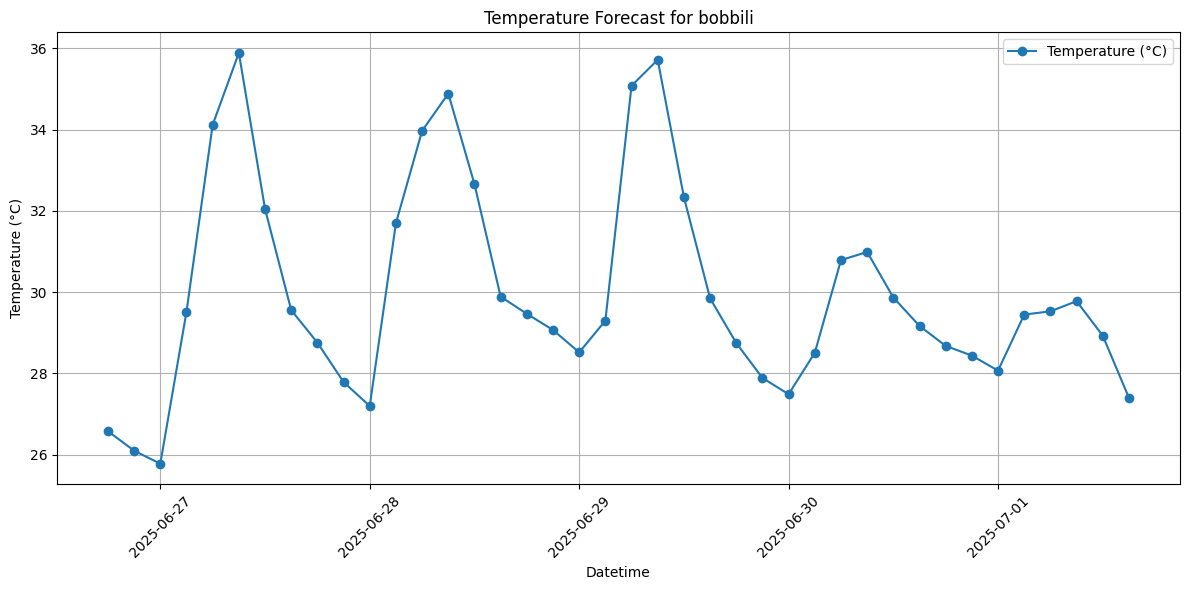

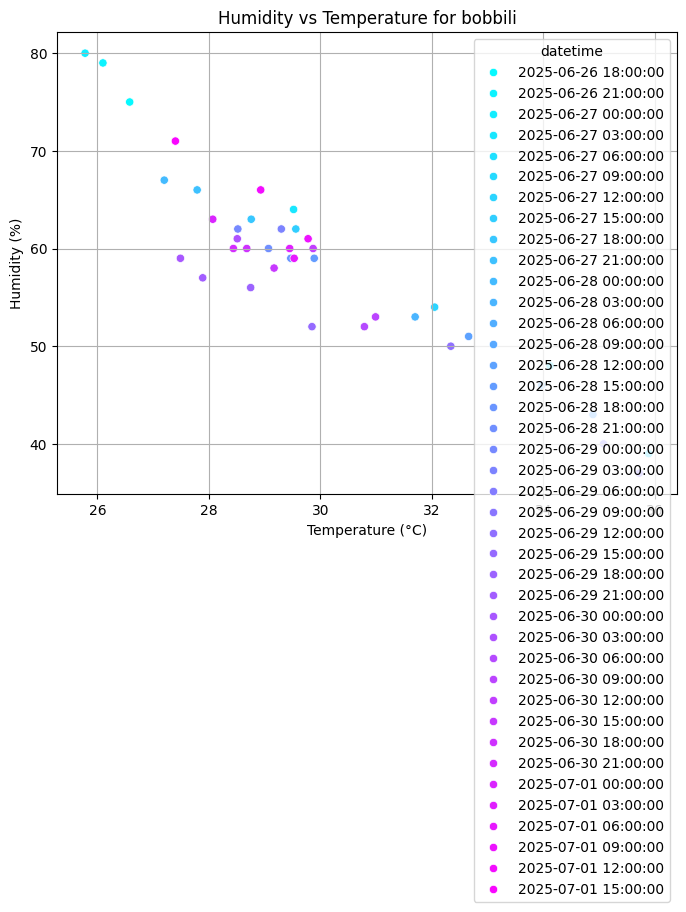

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fetch data from OpenWeatherMap API
API_KEY = "9e1e9a19ef2de306075e06210e1b1080"  # Replace with your API key
CITY = "bobbili"          # Replace with your preferred city
URL = f"http://api.openweathermap.org/data/2.5/forecast?q={CITY}&appid={API_KEY}&units=metric"

response = requests.get(URL)
data = response.json()

# Step 2: Parse and clean the data
# Extract relevant information (e.g., datetime, temperature, humidity)
weather_data = []
for item in data['list']:
    weather_data.append({
        'datetime': item['dt_txt'],
        'temperature': item['main']['temp'],
        'humidity': item['main']['humidity']
    })

# Convert to DataFrame
df = pd.DataFrame(weather_data)

# Convert datetime to pandas datetime object for better handling
df['datetime'] = pd.to_datetime(df['datetime'])

# Step 3: Data visualization
# Line plot for temperature
plt.figure(figsize=(12, 6))
plt.plot(df['datetime'], df['temperature'], marker='o', label='Temperature (°C)')
plt.title(f"Temperature Forecast for {CITY}")
plt.xlabel("Datetime")
plt.ylabel("Temperature (°C)")
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Scatter plot for humidity vs temperature using Seaborn
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='temperature', y='humidity', hue='datetime', palette='cool')
plt.title(f"Humidity vs Temperature for {CITY}")
plt.xlabel("Temperature (°C)")
plt.ylabel("Humidity (%)")
plt.grid(True)
plt.show()

